In [16]:
!git clone https://github.com/Oluchi-Otuadinma/Sexism-Classification.git

fatal: destination path 'Sexism-Classification' already exists and is not an empty directory.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from collections import Counter

In [18]:
import sys
sys.path.append('/content/Sexism-Classification/src')

In [19]:
from data.load_data import load_raw_csvs

PROJECT_PATH = "/content/Sexism-Classification"
RAW_PATH = f"{PROJECT_PATH}/data/raw"

dfs = load_raw_csvs(RAW_PATH)


In [20]:
dfs.keys()

dict_keys(['dev', 'train', 'test'])

In [21]:
train = dfs['train']
test = dfs['test']
dev = dfs['dev']

In [22]:
print(test.head())

                  rewire_id  \
0    sexism2022_english-845   
1   sexism2022_english-6629   
2  sexism2022_english-17573   
3  sexism2022_english-10268   
4  sexism2022_english-10735   

                                                text label_sexist  \
0  Fuck the niggers and the jews. Both have a his...   not sexist   
1  Well then good because someone has to knock he...       sexist   
2  #USA #Texas #Islam #Muslims #Islamization #Sha...   not sexist   
3  Yes, normal women want to be dominated. Social...       sexist   
4  She didn't have to be a bitch about it. She li...       sexist   

  label_category                        label_vector split  
0           none                                none  test  
1  2. derogation  2.2 aggressive and emotive attacks  test  
2           none                                none  test  
3  2. derogation             2.1 descriptive attacks  test  
4  2. derogation  2.2 aggressive and emotive attacks  test  


In [23]:
print(train.head())

                  rewire_id  \
0  sexism2022_english-16993   
1  sexism2022_english-13149   
2  sexism2022_english-13021   
3  sexism2022_english-14998   
4   sexism2022_english-7228   

                                                text label_sexist  \
0                            Then, she's a keeper. 😉   not sexist   
1  This is like the Metallica video where the poo...   not sexist   
2                                             woman?   not sexist   
3  Unlicensed day care worker reportedly tells co...   not sexist   
4  [USER] Leg day is easy. Hot girls who wear min...       sexist   

  label_category                         label_vector  split  
0           none                                 none  train  
1           none                                 none  train  
2           none                                 none  train  
3           none                                 none  train  
4   3. animosity  3.3 backhanded gendered compliments  train  


In [24]:
print(dev.head())

                  rewire_id  \
0   sexism2022_english-9609   
1    sexism2022_english-966   
2   sexism2022_english-3553   
3  sexism2022_english-13328   
4     sexism2022_english-81   

                                                text label_sexist  \
0  In Nigeria, if you rape a woman, the men rape ...   not sexist   
1                     I bet she wished she had a gun   not sexist   
2  I agree with that but at the same time I know ...       sexist   
3  democrats from Minnesota (leftist muzzie shith...       sexist   
4  Texas jury sentences Jordanian immigrant to de...   not sexist   

  label_category                        label_vector split  
0           none                                none   dev  
1           none                                none   dev  
2  2. derogation             2.1 descriptive attacks   dev  
3  2. derogation  2.2 aggressive and emotive attacks   dev  
4           none                                none   dev  


#Exploration

In [25]:
print("Train DF Info:")
train.info()
print("\nTrain DF Head:")
print(train.head())

print("\nDev DF Info:")
dev.info()
print("\nDev DF Head:")
print(dev.head())

print("\nTest DF Info:")
test.info()
print("\nTest DF Head:")
print(test.head())

Train DF Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
 5   split           14000 non-null  object
dtypes: object(6)
memory usage: 656.4+ KB

Train DF Head:
                  rewire_id  \
0  sexism2022_english-16993   
1  sexism2022_english-13149   
2  sexism2022_english-13021   
3  sexism2022_english-14998   
4   sexism2022_english-7228   

                                                text label_sexist  \
0                            Then, she's a keeper. 😉   not sexist   
1  This is like the Metallica video where the poo...   not sexist   
2                                             woman?   not sexist   
3  U

In [26]:
# Check for missing values
print("\nMissing values in Train DF:")
print(train.isnull().sum())
print("\nMissing values in Dev DF:")
print(dev.isnull().sum())
print("\nMissing values in Test DF:")
print(test.isnull().sum())


Missing values in Train DF:
rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
split             0
dtype: int64

Missing values in Dev DF:
rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
split             0
dtype: int64

Missing values in Test DF:
rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
split             0
dtype: int64


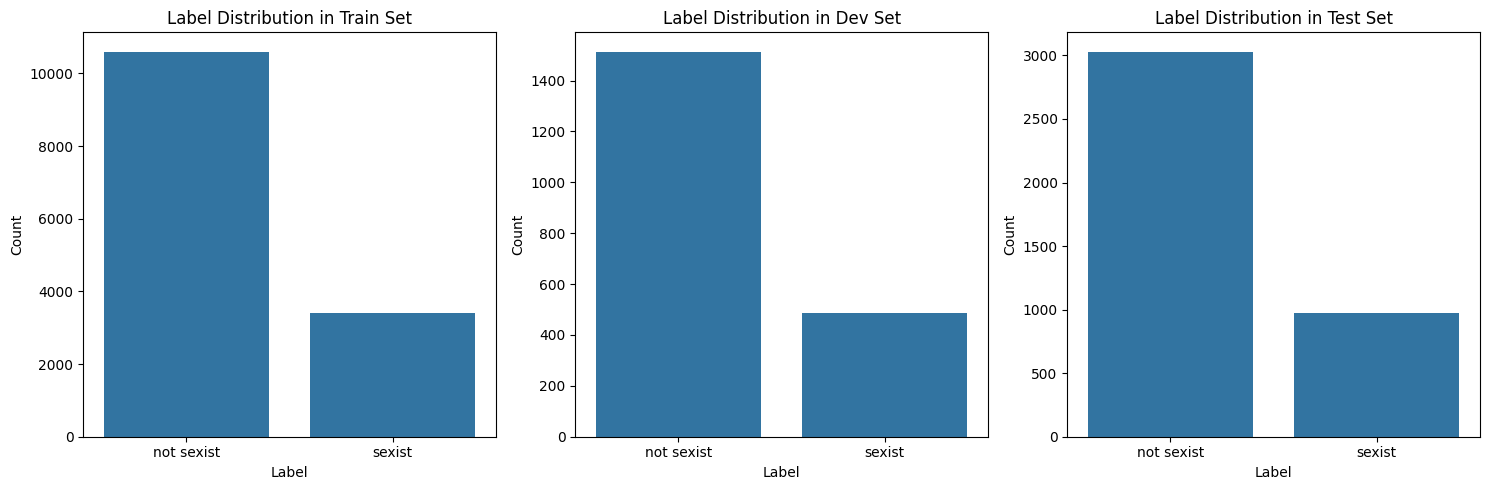

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=train, x='label_sexist')
plt.title('Label Distribution in Train Set')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=dev, x='label_sexist')
plt.title('Label Distribution in Dev Set')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(data=test, x='label_sexist')
plt.title('Label Distribution in Test Set')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
def get_top_ngrams(corpus, n=1, top_k=20):
    words = re.findall(r'\b\w+\b', ' '.join(corpus).lower())
    if n == 1:
        return Counter(words).most_common(top_k)
    else:
        ngrams = []
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
        return Counter(ngrams).most_common(top_k)

print(f"Unique values in 'label_sexist' column (Train Set): {train['label_sexist'].unique()}")
print(f"Unique values in 'label_sexist' column (Dev Set): {dev['label_sexist'].unique()}")
print(f"Unique values in 'label_sexist' column (Test Set): {test['label_sexist'].unique()}")


Unique values in 'label_sexist' column (Train Set): ['not sexist' 'sexist']
Unique values in 'label_sexist' column (Dev Set): ['not sexist' 'sexist']
Unique values in 'label_sexist' column (Test Set): ['not sexist' 'sexist']


In [29]:
positive_label_value = 'sexist'
negative_label_value = 'not sexist'

# Filter texts based on the 'label_sexist' column
sexist_texts_train = train[train['label_sexist'] == positive_label_value]['text']
non_sexist_texts_train = train[train['label_sexist'] == negative_label_value]['text']
sexist_texts_dev = dev[dev['label_sexist'] == positive_label_value]['text']
non_sexist_texts_dev = dev[dev['label_sexist'] == negative_label_value]['text']
sexist_texts_test = test[test['label_sexist'] == positive_label_value]['text']
non_sexist_texts_test = test[test['label_sexist'] == negative_label_value]['text']

total_texts_train = len(train)
total_texts_dev = len(dev)
total_texts_test = len(test)

# Get numerical counts
num_sexist_train = len(sexist_texts_train)
num_sexist_dev = len(sexist_texts_dev)
num_sexist_test = len(sexist_texts_test)

print(f"\nNumber of '{positive_label_value}' texts in train set: {len(sexist_texts_train)}")
print(f"Number of '{negative_label_value}' texts in train set: {len(non_sexist_texts_train)}")
print(f"Percentage of sexist text in train set: '{(num_sexist_train / total_texts_train) * 100}'")

print(f"\nNumber of '{positive_label_value}' texts in dev set: {len(sexist_texts_dev)}")
print(f"Number of '{negative_label_value}' texts in dev set: {len(non_sexist_texts_dev)}")
print(f"Percentage of sexist text in dev set: '{(num_sexist_dev / total_texts_dev) * 100}'")

print(f"\nNumber of '{positive_label_value}' texts in test set: {len(sexist_texts_test)}")
print(f"Number of '{negative_label_value}' texts in test set: {len(non_sexist_texts_test)}")
print(f"Percentage of sexist text in test set: '{(num_sexist_test / total_texts_test) * 100}'")

top_sexist_unigrams = get_top_ngrams(sexist_texts_train, n=1)
top_non_sexist_unigrams = get_top_ngrams(non_sexist_texts_train, n=1)
top_sexist_bigrams = get_top_ngrams(sexist_texts_train, n=2, top_k=10)
top_non_sexist_bigrams = get_top_ngrams(non_sexist_texts_train, n=2, top_k=10)


Number of 'sexist' texts in train set: 3398
Number of 'not sexist' texts in train set: 10602
Percentage of sexist text in train set: '24.271428571428572'

Number of 'sexist' texts in dev set: 486
Number of 'not sexist' texts in dev set: 1514
Percentage of sexist text in dev set: '24.3'

Number of 'sexist' texts in test set: 970
Number of 'not sexist' texts in test set: 3030
Percentage of sexist text in test set: '24.25'


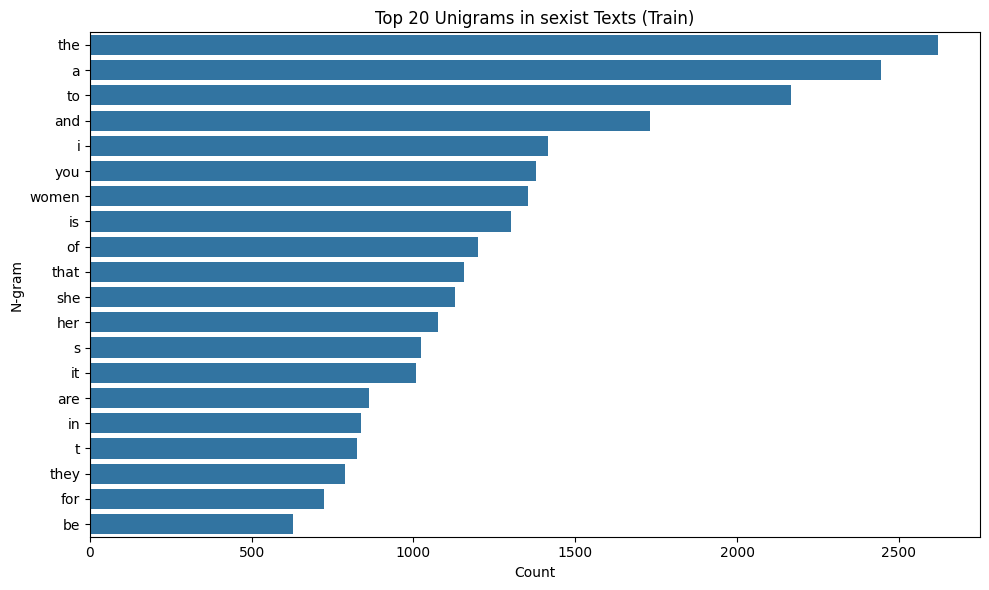

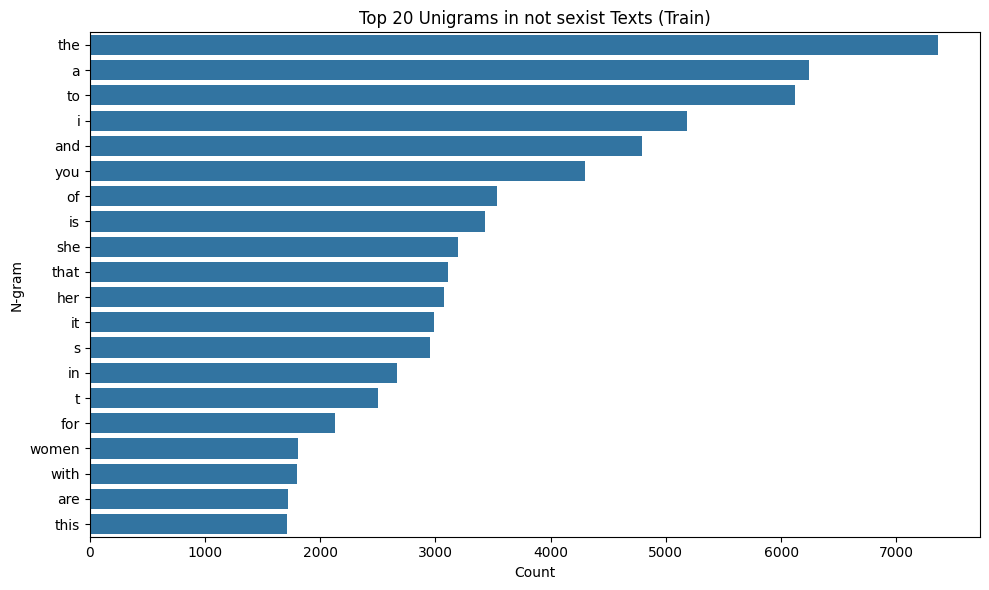

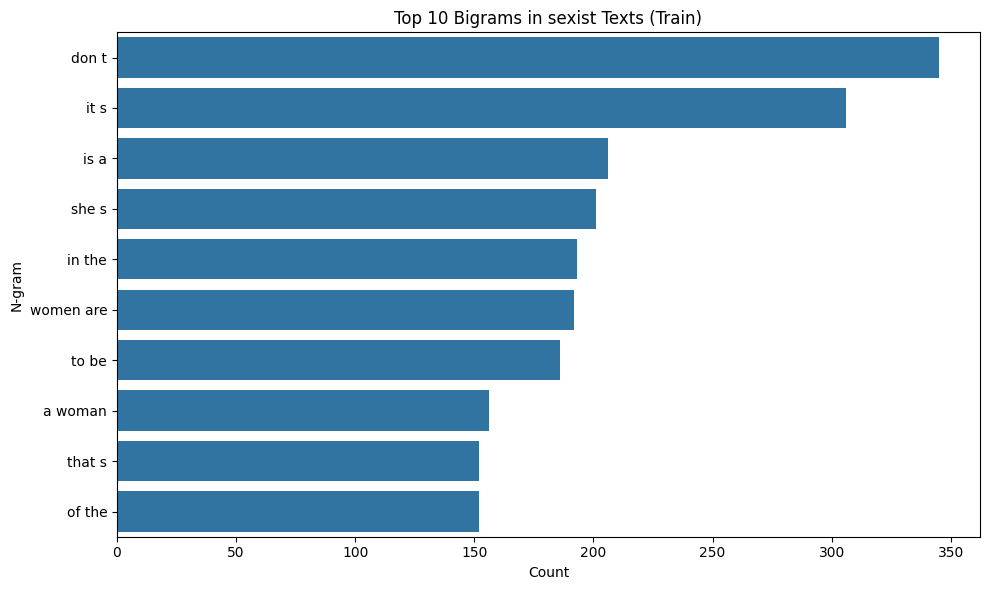

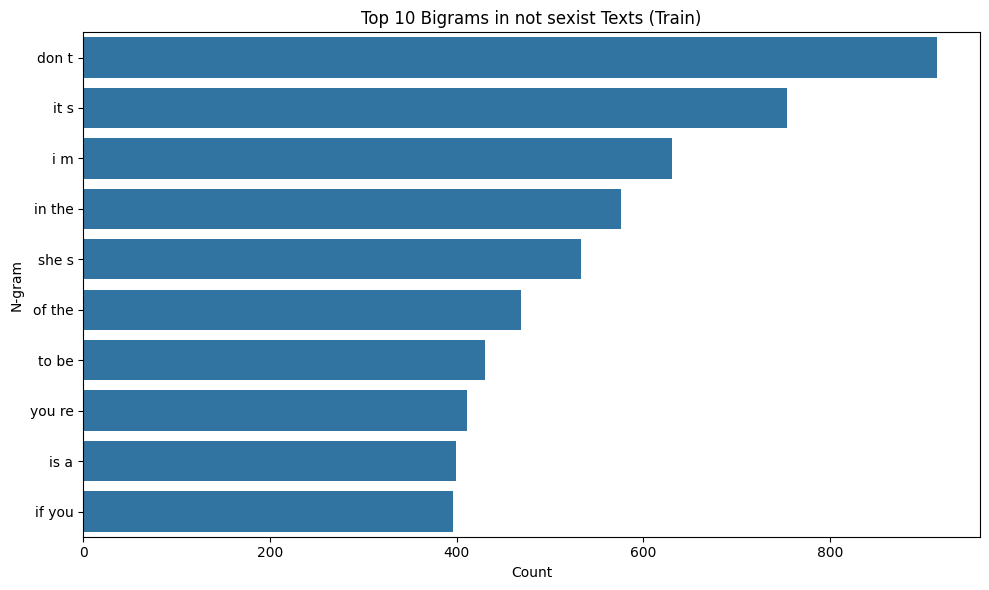

In [30]:
def plot_ngrams(ngram_list, title):
    if not ngram_list:
        print(f"No n-grams to plot for: {title}")
        return
    df_ngrams = pd.DataFrame(ngram_list, columns=['ngram', 'count'])

    # Convert ngram tuples to strings for better plotting
    if isinstance(df_ngrams['ngram'].iloc[0], tuple):
        df_ngrams['ngram'] = df_ngrams['ngram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='ngram', data=df_ngrams.sort_values(by='count', ascending=False))
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.tight_layout()
    plt.show()

# Plotting
plot_ngrams(top_sexist_unigrams, f'Top 20 Unigrams in {positive_label_value} Texts (Train)')
plot_ngrams(top_non_sexist_unigrams, f'Top 20 Unigrams in {negative_label_value} Texts (Train)')
plot_ngrams(top_sexist_bigrams, f'Top 10 Bigrams in {positive_label_value} Texts (Train)')
plot_ngrams(top_non_sexist_bigrams, f'Top 10 Bigrams in {negative_label_value} Texts (Train)')
